# Multilayered perceptron (MLP) image classification exercises

## 0. Fashion dataset (*)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.datasets.fashion_mnist import load_data

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

 a) Start visualizing some of the sample images

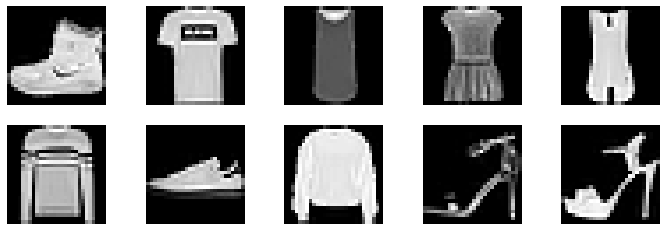

In [4]:
def plot_images(data):
    fig, axes = plt.subplots(2, 5, figsize = (12, 4))

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i], cmap = "gray")
        ax.axis("off")

plot_images(X_train)

b) Normalize the images to values between 0 and 1

In [5]:
scaled_X_train = X_train.astype("float32") / 255
scaled_X_test = X_test.astype("float32") / 255

c) Visualize same images as before, do you see any difference?

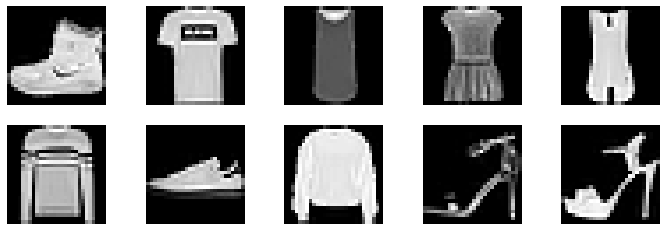

In [6]:
plot_images(scaled_X_train)

I do not see any difference.

  d) Make histogram of a sample image before and after normalization. What do you notice?

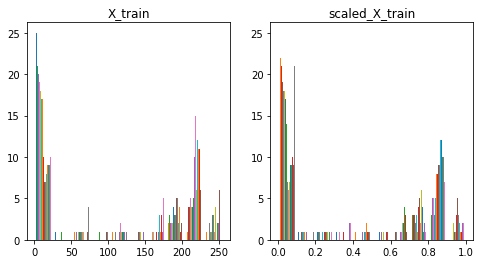

In [7]:
fig, axes = plt.subplots(1, 2, figsize = (8,4))
axes[0].hist(X_train[0])
axes[0].set_title("X_train")

axes[1].hist(scaled_X_train[0])
axes[1].set_title("scaled_X_train");

 e) Check if the dataset is balanced.

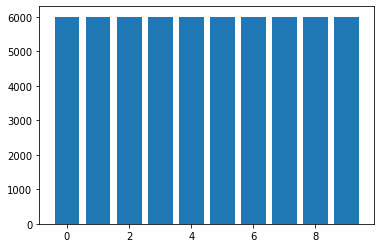

In [8]:
data_spread = np.unique(y_train, return_counts=True)

plt.bar(x = data_spread[0], height = data_spread[1]);

Data is perfectly balanced.

## 1. MLP architecture (*)

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [10]:
def MLP_model(nodes = None, names = None, activations = []):
    model = Sequential(name = "MLP_model")
    model.add(Flatten(input_shape = (28, 28), name = "Input_layer"))
    
    for node, name, activation in zip(nodes, names, activations):
        model.add(Dense(node, name = name, activation = activation))
        
    model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
    
    return model

In [11]:
model_1 = MLP_model([10], ["Output_layer"], ["softmax"])
model_1.summary()

Model: "MLP_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Flatten)       (None, 784)               0         
                                                                 
 Output_layer (Dense)        (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_1.fit(scaled_X_train, y_train, epochs = 50, validation_split = 1/6)

Epoch 1/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3968 - accuracy: 0.8640 - val_loss: 0.4297 - val_accuracy: 0.8490
Epoch 2/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3933 - accuracy: 0.8627 - val_loss: 0.4198 - val_accuracy: 0.8564
Epoch 3/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3905 - accuracy: 0.8649 - val_loss: 0.4583 - val_accuracy: 0.8391
Epoch 4/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3893 - accuracy: 0.8645 - val_loss: 0.4219 - val_accuracy: 0.8559
Epoch 5/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3860 - accuracy: 0.8660 - val_loss: 0.4152 - val_accuracy: 0.8563
Epoch 6/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3839 - accuracy: 0.8661 - val_loss: 0.4211 - val_accuracy: 0.8518
Epoch 7/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3821 - accuracy: 0.8671 - val_loss: 0.4143 - val_accuracy:

In [10]:
def plot_history(df_history):
    _, axes = plt.subplots(1, 2, figsize = (12, 4))
    columns = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    
    for ax, col in zip(axes, columns):
        df_history.plot(y = col, ax = ax, xlabel = "Epochs", ylabel = col[0])
        ax.grid()

In [15]:
test = pd.DataFrame(model_1.history.history)

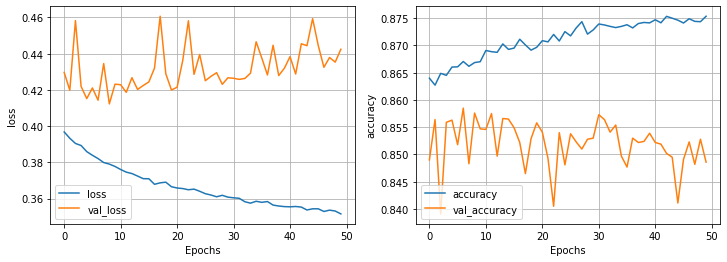

In [25]:
plot_history(test)

In [27]:
model_2 = MLP_model([128, 10], ["Hidden1", "Output_layer"], ["relu", "softmax"])

In [28]:
model_2.fit(scaled_X_train, y_train, epochs = 50, validation_split = 1/6)

Epoch 1/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.5216 - accuracy: 0.8166 - val_loss: 0.4372 - val_accuracy: 0.8417
Epoch 2/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3876 - accuracy: 0.8614 - val_loss: 0.3745 - val_accuracy: 0.8660
Epoch 3/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3487 - accuracy: 0.8711 - val_loss: 0.3523 - val_accuracy: 0.8754
Epoch 4/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3214 - accuracy: 0.8812 - val_loss: 0.3483 - val_accuracy: 0.8717
Epoch 5/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3012 - accuracy: 0.8891 - val_loss: 0.3369 - val_accuracy: 0.8810
Epoch 6/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.8961 - val_loss: 0.3521 - val_accuracy: 0.8749
Epoch 7/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2724 - accuracy: 0.8984 - val_loss: 0.3374 - val_accuracy:

In [29]:
model_3 = MLP_model([128, 128, 10], ["Hidden1", "Hidden2", "Output"], ["relu", "relu", "softmax"])
model_4 = MLP_model([128, 128, 128, 10], ["Hidden1", "Hidden2", "Hidden3","Output"], ["relu", "relu", "relu", "softmax"])

In [30]:
model_3.fit(scaled_X_train, y_train, epochs = 50, validation_split = 1/6)

Epoch 1/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.4986 - accuracy: 0.8210 - val_loss: 0.4196 - val_accuracy: 0.8449
Epoch 2/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3713 - accuracy: 0.8627 - val_loss: 0.3898 - val_accuracy: 0.8608
Epoch 3/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3355 - accuracy: 0.8765 - val_loss: 0.3737 - val_accuracy: 0.8668
Epoch 4/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3125 - accuracy: 0.8841 - val_loss: 0.3452 - val_accuracy: 0.8703
Epoch 5/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2943 - accuracy: 0.8909 - val_loss: 0.3260 - val_accuracy: 0.8822
Epoch 6/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2800 - accuracy: 0.8939 - val_loss: 0.3252 - val_accuracy: 0.8832
Epoch 7/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9001 - val_loss: 0.3662 - val_accuracy:

In [31]:
model_4.fit(scaled_X_train, y_train, epochs = 50, validation_split = 1/6)

Epoch 1/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.5067 - accuracy: 0.8165 - val_loss: 0.4124 - val_accuracy: 0.8495
Epoch 2/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3709 - accuracy: 0.8631 - val_loss: 0.4100 - val_accuracy: 0.8529
Epoch 3/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3366 - accuracy: 0.8746 - val_loss: 0.3466 - val_accuracy: 0.8726
Epoch 4/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3114 - accuracy: 0.8849 - val_loss: 0.3450 - val_accuracy: 0.8775
Epoch 5/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2960 - accuracy: 0.8892 - val_loss: 0.3425 - val_accuracy: 0.8764
Epoch 6/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2767 - accuracy: 0.8956 - val_loss: 0.3941 - val_accuracy: 0.8525
Epoch 7/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9001 - val_loss: 0.3380 - val_accuracy:

In [37]:
history_1 = test
history_2 = pd.DataFrame(model_2.history.history)
history_3 = pd.DataFrame(model_3.history.history)
history_4 = pd.DataFrame(model_4.history.history)

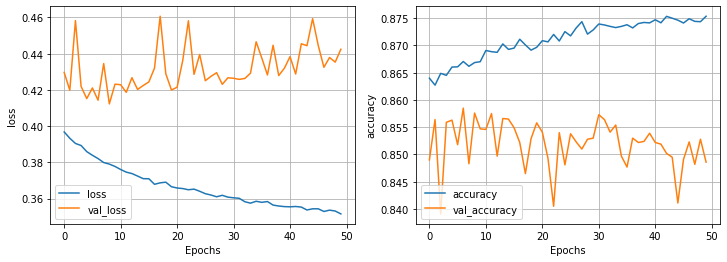

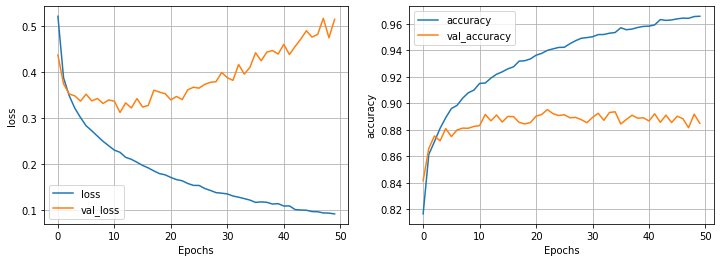

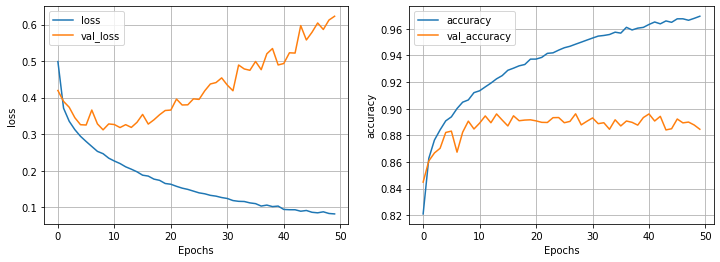

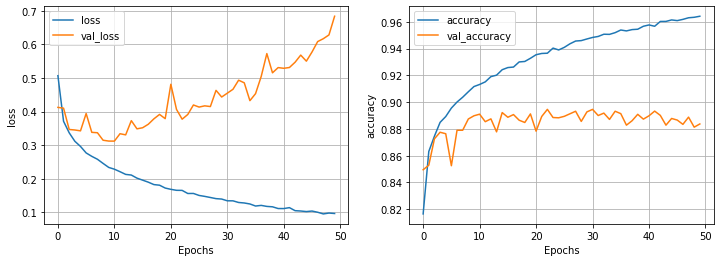

In [40]:
history = [history_1, history_2, history_3, history_4]
for data in history:
    plot_history(data)

Very similar result wiht one, two and three hidden layers

d) Add dropout layers and choose a rate of dropout, and perform a few experiments. Note that you shouldn't add dropout layers after input layer and after output layer.

In [13]:
from tensorflow.keras.layers import Dropout

In [30]:
def MLP_model_dropout(nodes = None, names = None, activations = [], drop_rate = .5):
    model = Sequential(name = "MLP_model")
    model.add(Flatten(input_shape = (28, 28), name = "Input_layer"))
    
    for node, name, activation in zip(nodes, names, activations):
        model.add(Dense(node, name = name, activation = activation))
        model.add(Dropout(drop_rate))
        
    model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["acc"])
    
    return model

In [15]:
model1 = MLP_model_dropout([128, 10], ["Hidden1", "Output"], ["relu", "softmax"])
model2 = MLP_model_dropout([64, 10], ["Hidden1", "Output"], ["relu", "softmax"])
model3 = MLP_model_dropout([128, 128, 10], ["Hidden1", "Hidden2", "Output"], ["relu", "relu", "softmax"])
model4 = MLP_model_dropout([64, 64, 10], ["Hidden1", "Hidden2", "Output"], ["relu", "relu", "softmax"])
model5 = MLP_model_dropout([256, 128, 10], ["Hidden1", "Hidden2", "Output"], ["relu", "relu", "softmax"])

In [16]:
model1.fit(scaled_X_train, y_train, epochs = 20, validation_split = 1/6)
model2.fit(scaled_X_train, y_train, epochs = 20, validation_split = 1/6)
model3.fit(scaled_X_train, y_train, epochs = 20, validation_split = 1/6)
model4.fit(scaled_X_train, y_train, epochs = 20, validation_split = 1/6)
model5.fit(scaled_X_train, y_train, epochs = 20, validation_split = 1/6)

Epoch 1/20
1563/1563 [==============================] - 5s 2ms/step - loss: 4.2202 - accuracy: 0.3931 - val_loss: 2.7394 - val_accuracy: 0.7599
Epoch 2/20
1563/1563 [==============================] - 3s 2ms/step - loss: 3.2214 - accuracy: 0.4269 - val_loss: 2.0674 - val_accuracy: 0.8045
Epoch 3/20
1563/1563 [==============================] - 4s 2ms/step - loss: 2.9657 - accuracy: 0.4366 - val_loss: 2.1685 - val_accuracy: 0.8162
Epoch 4/20
1563/1563 [==============================] - 4s 2ms/step - loss: 2.8633 - accuracy: 0.4427 - val_loss: 2.1619 - val_accuracy: 0.8226
Epoch 5/20
1563/1563 [==============================] - 4s 2ms/step - loss: 2.7578 - accuracy: 0.4490 - val_loss: 2.1521 - val_accuracy: 0.8264
Epoch 6/20
1563/1563 [==============================] - 4s 2ms/step - loss: 2.7134 - accuracy: 0.4510 - val_loss: 2.1391 - val_accuracy: 0.8285
Epoch 7/20
1563/1563 [==============================] - 4s 2ms/step - loss: 2.6561 - accuracy: 0.4546 - val_loss: 2.0724 - val_accuracy:

In [17]:
to_plot = [pd.DataFrame(model1.history.history), 
           pd.DataFrame(model2.history.history), 
           pd.DataFrame(model3.history.history), 
           pd.DataFrame(model4.history.history), 
           pd.DataFrame(model5.history.history)]

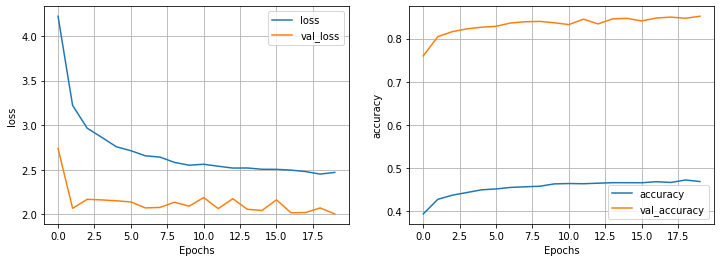

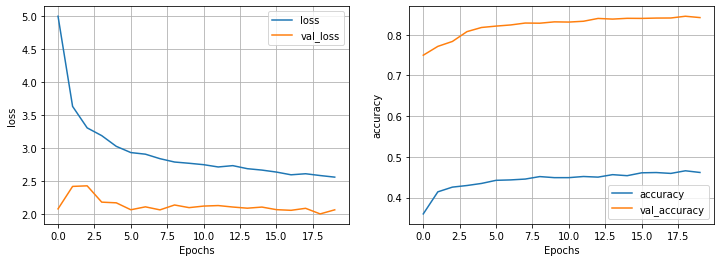

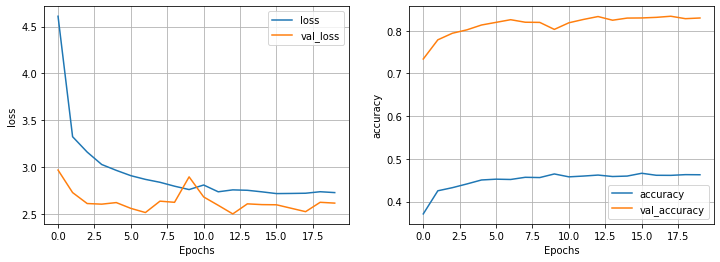

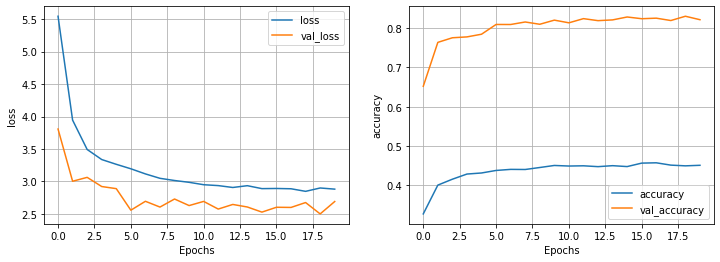

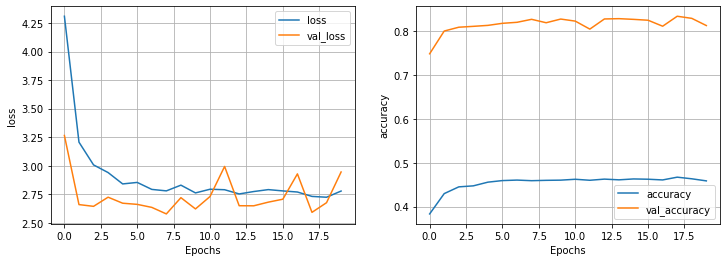

In [18]:
for data in to_plot:
    plot_history(data)

## 2. Predict and evaluate (*)

In [32]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [34]:
model = MLP_model_dropout([256, 128, 10], ["Hidden1", "Hidden2", "Output"], ["relu", "relu", "softmax"])

early_stopper = EarlyStopping(monitor = "acc", mode = "max", patience = 5)

model.fit(
    scaled_X_train,
    y_train,
    epochs = 100,
    callbacks = [early_stopper],
)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 4.0637 - acc: 0.3875
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 3.1635 - acc: 0.4364
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.9649 - acc: 0.4438
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.9349 - acc: 0.4483
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.8612 - acc: 0.4565
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.8547 - acc: 0.4550
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.8120 - acc: 0.4596
Epoch 8/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.8317 - acc: 0.4611
Epoch 9/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.7714 - acc: 0.4636
Epoch 10/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.7916 - acc: 0.4620
Epoch 11/100
1875/1

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

              precision    recall  f1-score   support

           0       0.65      0.91      0.76      1000
           1       0.98      0.94      0.96      1000
           2       0.68      0.76      0.71      1000
           3       0.89      0.78      0.83      1000
           4       0.71      0.70      0.70      1000
           5       0.96      0.91      0.93      1000
           6       0.65      0.44      0.52      1000
           7       0.86      0.97      0.91      1000
           8       0.94      0.94      0.94      1000
           9       0.95      0.90      0.93      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000



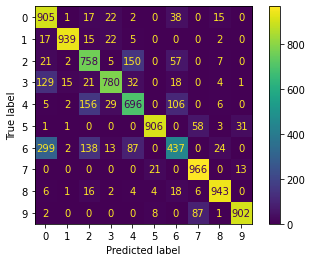

In [42]:
y_pred = model.predict(scaled_X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

The hardest to predict labels were Shirt, Pullover, Dress and Coat

b) Show a few samples from each category that was misclassified.

In [50]:
misclassified = np.where(y_pred != y_test)
misclassfied_samples = X_test[misclassified]

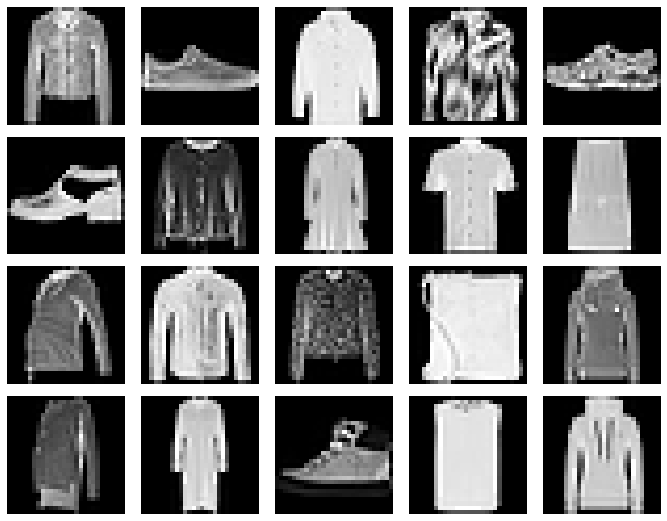

In [49]:
def display_images(data, nrows = 2, ncols = 5, figsize = (12, 4)):
    fig, axes = plt.subplots(nrows, ncols, figsize = figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i,:,:], cmap = "gray")
        ax.axis("off")
    
    fig.subplots_adjust(wspace = 0, hspace = .1, bottom = 0)

display_images(misclassfied_samples, 4, 5, (12, 8))

In [53]:
misclassfied_samples.shape

(1768, 28, 28)

In [56]:
import os

In [64]:
try: 
    os.mkdir(f"{os.path.abspath('')}/Data/misclassifications")
except FileExistsError as err:
    print(err)

[WinError 183] Cannot create a file when that file already exists: 'c:\\Users\\chris\\Documents\\GitHub\\Deep_learning_Christopher_Seander\\Exercises/Data/misclassifications'


In [71]:
for i in range(0, len(misclassfied_samples)):
    plt.imsave(f"Data/misclassifications/misclassified_image_{i}.png",misclassfied_samples[i], cmap = "gray")